# Importing Libraries

In [17]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 

### Reading mnist data using pandas

In [2]:
df=pd.read_csv('fashion-mnist_train.csv')

In [3]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Drop label column

In [4]:
df1=df.drop(['label'],axis=1)
df1.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X = df1.values[:,1:]

# Question1

In [6]:
from sklearn.cluster import KMeans
K_Means=KMeans(n_clusters=5, init='random').fit(X)
labels=K_Means.labels_


using PCA for dimensionally reduction.For see 2D visualization in plot

In [7]:
pca = PCA(n_components = 2) 
X_principal1 = pca.fit_transform(X) 
X_principal1 = pd.DataFrame(X_principal1) 
X_principal1.columns = ['P1', 'P2'] 

### Data 2D Visualization

Text(0.5, 1.0, 'AFter applying PCA  Data 2D Visualization.  ')

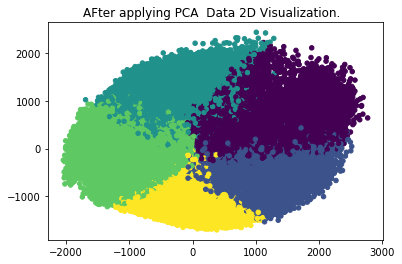

In [8]:
import pylab
pylab.scatter(X_principal1['P1'], X_principal1['P2'], 20, labels)
pylab.title("AFter applying PCA  Data 2D Visualization.  ")

In [9]:
true_labels=df['label']
true_labels=true_labels.values

In [24]:
from sklearn import metrics
Score=metrics.adjusted_rand_score(true_labels, labels)
print("So the Rand adjusted Score is ",Score)

So the Rand adjusted Score is  0.3913622170983978


# Question 2

In [13]:
Scores=[]
KS=[]
for i in range(5,16):
    K_Means=KMeans(n_clusters=i, init='random').fit(X)
    labels=K_Means.labels_
    Score=metrics.adjusted_rand_score(true_labels, labels)
    KS.append(i)
    Scores.append(Score)


Summarizing results in Table

In [14]:
data={"K":KS,'Rand_Score':Scores}

M1 = pd.DataFrame(data)
M1


,K,Rand_Score
0,5,0.281418
1,6,0.325578
2,7,0.369067
3,8,0.365768
4,9,0.373838
5,10,0.349273
6,11,0.348939
7,12,0.380425
8,13,0.372210
9,14,0.391484


##### plot to show the result so we easily identify the best k

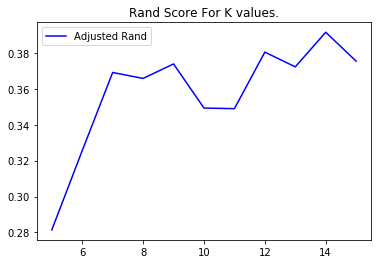

In [18]:
plt.figure()
plt.plot(KS,Scores, 'b', label='Adjusted Rand')
plt.title('Rand Score For K values.')
plt.legend()

# So we see in plot. we get best value of k at 14 

# Question 3

Run 5 times over the Fashion-MNIST dataset

In [19]:
Labels=[]
RScores=[]
KS=[]
initialization=[]
for i in range(5):
    K_Means=KMeans(n_clusters=14, init='random').fit(X)
    labels=K_Means.labels_
    Score2=metrics.adjusted_rand_score(true_labels, labels)
    Labels.append(labels)
    RScores.append(Score2)
    initialization.append(str('Random'+str(i+1)))
    KS.append(14)


### Report results

In [20]:
data={"K":KS,'Initialization':initialization,'Adjust Rand Score':RScores}
M2 = pd.DataFrame(data)

In [21]:
M2

,K,Initialization,Adjust Rand Score
0,14,Random1,0.391346
1,14,Random2,0.391409
2,14,Random3,0.390411
3,14,Random4,0.390401
4,14,Random5,0.391362


#### Data 2D Visualization of best results

Text(0.5, 1.0, 'AFter applying PCA  Data 2D Visualization.  ')

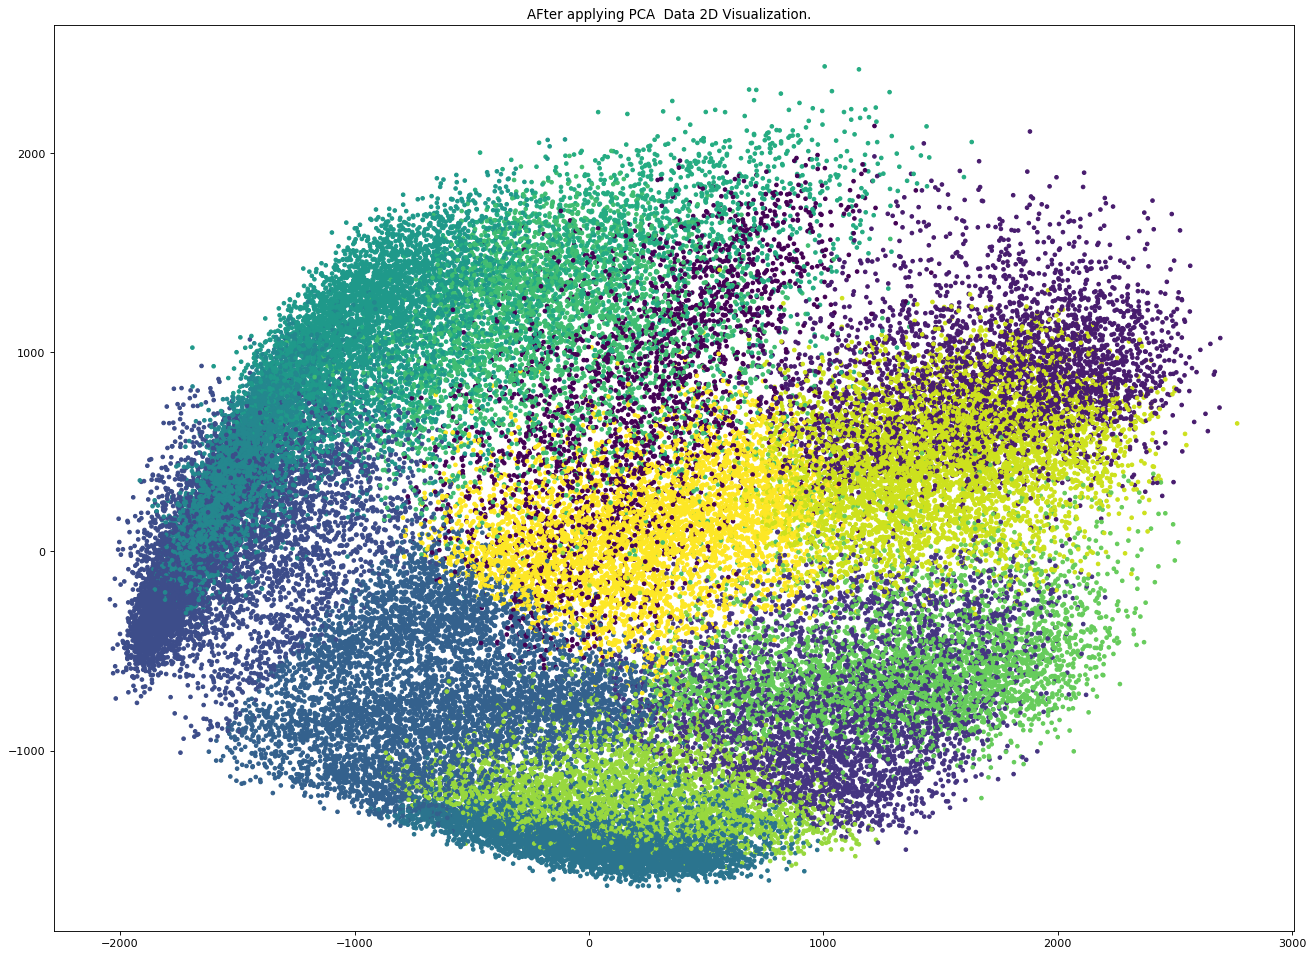

In [22]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
import pylab
pylab.scatter(X_principal1['P1'], X_principal1['P2'], 10, Labels[0])
pylab.title("AFter applying PCA  Data 2D Visualization.  ")

# Question 4

In Starting we have Mnist data set so we read csv data using pandas. Then drop the label column and store in new dataframe.
then store all values in X variable. After this I apply KMeans algorithm. With k value 5 and initialization is random.
Print the rand score. So we see its very low. So then in question 2 I apply K_Means algorithm by giving K values from 5 to 15
so after this We see results in table. So we easily identify at K=14 we get best results. So next we give k = 14 and 
intialization is random and run algorithm by 5 times.  and show the result in table. And also i learn that how KMean works. K value is basically mean that how much clusters we want. And how Euclien distance works in KMean algorithim. and how k values changes its mean untill converges. 